# AutoEncoders and Generative Models

**Autoencoder**

In [1]:
from keras.datasets import mnist
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
(X_train, _), (X_test, _) = mnist.load_data()

X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

X_train = X_train.reshape(len(X_train), np.prod(X_train.shape[1:]))
X_test = X_test.reshape(len(X_test), np.prod(X_test.shape[1:]))

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [3]:
input_img= Input(shape=(784,))

In [4]:
# Create simple autoencoder

# The size of our encoded representations
# 32 floats -> compression of factor 24.5, assuming the input is 784 floats
encoding_dim = 32  

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# This model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [5]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [6]:
encoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Compile the model
autoencoder.compile(optimizer='nadam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
autoencoder.fit(X_train, X_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/5
235/235 [==============================] - 2s 5ms/step - loss: 0.2724 - accuracy: 0.0122 - val_loss: 0.1912 - val_accuracy: 0.0144
Epoch 2/5
235/235 [==============================] - 1s 5ms/step - loss: 0.1705 - accuracy: 0.0125 - val_loss: 0.1524 - val_accuracy: 0.0112
Epoch 3/5
235/235 [==============================] - 1s 4ms/step - loss: 0.1430 - accuracy: 0.0104 - val_loss: 0.1330 - val_accuracy: 0.0105
Epoch 4/5
235/235 [==============================] - 1s 4ms/step - loss: 0.1276 - accuracy: 0.0097 - val_loss: 0.1204 - val_accuracy: 0.0105
Epoch 5/5
235/235 [==============================] - 1s 4ms/step - loss: 0.1170 - accuracy: 0.0101 - val_loss: 0.1115 - val_accuracy: 0.0125


In [8]:
# Make predictions with the test data
encoded_imgs = encoder.predict(X_test)
predicted = autoencoder.predict(X_test)

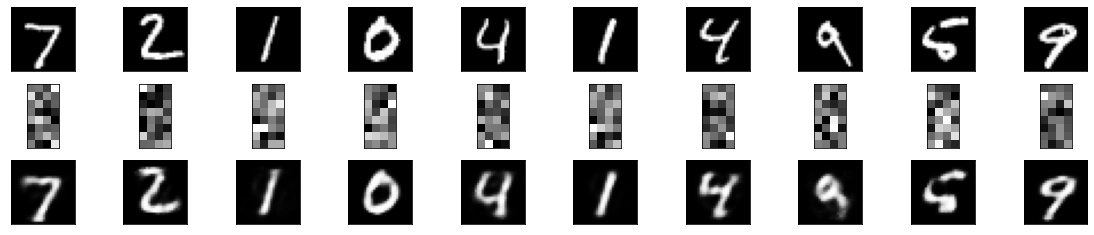

<Figure size 432x288 with 0 Axes>

In [10]:
# Plotting code from:
# https://medium.com/datadriveninvestor/deep-autoencoder-using-keras-b77cd3e8be95

# Plot the results
plt.figure(figsize=(40, 4))
for i in range(10):
    # display original images
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display encoded images
    ax = plt.subplot(3, 20, i + 1 + 20)
    plt.imshow(encoded_imgs[i].reshape(8,4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstructed images
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(predicted[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


plt.show() # Uncomment to see the figure

# Clear the figure for proper Canvas formatting
plt.clf()

**for better results more hidden layers could be added**

In [11]:
# Deeper autoencoder
encoded = Dense(units=128, activation='relu')(input_img)
encoded = Dense(units=64, activation='relu')(encoded)
encoded = Dense(units=32, activation='relu')(encoded)
decoded = Dense(units=64, activation='relu')(encoded)
decoded = Dense(units=128, activation='relu')(decoded)
decoded = Dense(units=784, activation='sigmoid')(decoded)

**Recive similar images**

In [12]:
# Train an autoencoder
from keras.datasets import mnist
from keras.layers import Input, Dense, Flatten
from keras.models import Model
import numpy as np
import pandas as pd

(X_train, _), (X_test, _) = mnist.load_data()

X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

X_train = X_train.reshape(len(X_train), np.prod(X_train.shape[1:]))
X_test = X_test.reshape(len(X_test), np.prod(X_test.shape[1:]))

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [13]:
input_img= Input(shape=(784,))

# Create simple autoencoder

# The size of our encoded representations
encoding_dim = 32  

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# This model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [14]:
# Compile the model
autoencoder.compile(optimizer='nadam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
autoencoder.fit(X_train, X_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/10
235/235 [==============================] - 2s 5ms/step - loss: 0.2706 - accuracy: 0.0108 - val_loss: 0.1900 - val_accuracy: 0.0097
Epoch 2/10
235/235 [==============================] - 1s 5ms/step - loss: 0.1695 - accuracy: 0.0117 - val_loss: 0.1513 - val_accuracy: 0.0125
Epoch 3/10
235/235 [==============================] - 1s 4ms/step - loss: 0.1417 - accuracy: 0.0117 - val_loss: 0.1311 - val_accuracy: 0.0112
Epoch 4/10
235/235 [==============================] - 1s 4ms/step - loss: 0.1263 - accuracy: 0.0107 - val_loss: 0.1196 - val_accuracy: 0.0093
Epoch 5/10
235/235 [==============================] - 1s 4ms/step - loss: 0.1170 - accuracy: 0.0117 - val_loss: 0.1125 - val_accuracy: 0.0126
Epoch 6/10
235/235 [==============================] - 1s 4ms/step - loss: 0.1107 - accuracy: 0.0131 - val_loss: 0.1070 - val_accuracy: 0.0121
Epoch 7/10
235/235 [==============================] - 1s 4ms/step - loss: 0.1059 - accuracy: 0.0131 - val_loss: 0.1029 - val_accuracy: 0.0124
Epoch 

In [15]:
#import tensorflow as tf

#encoded = tf.keras.layers.Flatten()(encoded)
encoded = Flatten()(encoded)

encoder = Model(input_img, encoded)

encoded_imgs = encoder.predict(X_train)

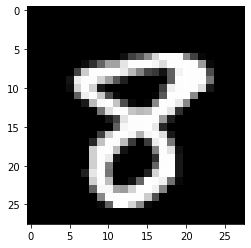

In [17]:
# Let's plot!
import matplotlib.pyplot as plt

# Look up an image that corresponds to this code
query =  34534

plt.imshow(X_train[query].reshape(28, 28));

In [18]:
# Use the encoder model to create the encoded representation
query_encoding = encoder.predict(np.expand_dims(X_train[query],0))

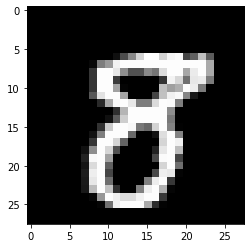

In [20]:
# Use the nearest neighbors algorithm to look up the images
# that have the closest representation

from sklearn.neighbors import NearestNeighbors

# Instantiate the model and fit on the encoded images
nn = NearestNeighbors(n_neighbors=5, algorithm='ball_tree')
nn.fit(encoded_imgs)

# Find the result from the query encoding
results = nn.kneighbors(query_encoding)

# Select and plot the first of the images retrieved
results_loc = results[1][0][1:]
plt.imshow(X_train[results_loc[1]].reshape(28, 28));